In [1]:
import sqlite3
from sqlite3 import Error
from sqlite3 import IntegrityError
from ipyfilechooser import FileChooser
import pandas as pd
import io
import requests
import numpy
import seaborn as sns
from scipy import stats
import math
from scipy.stats import ttest_ind
import tqdm

## Clustering Playtest

The below cells are for exploring clustering functionalities. Currently under development.

In [2]:
conn = sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
tstat_gene = pd.read_sql_query(f"SELECT * FROM tstat_gene_data", conn)
conn.close()

In [3]:
data = tstat_gene.drop(tstat_gene[tstat_gene.Gene == "N2"].index)
data = data.drop(columns=['Spontaneous Recovery of Response Duration',
                          'Spontaneous Recovery of Response Probability',
                          'Spontaneous Recovery of Response Speed'])
data_na = data.dropna().reset_index().drop(columns=['index'])
data_na.head(10)

,Gene,Width,Length,Area,Instantaneous Speed,Interval Speed,Angular Speed,Bias,Aspect Ratio,Kink,...,Initial Response Duration,Initial Response Probability,Initial Response Speed,Final Response Duration,Final Response Probability,Final Response Speed,Habituation of Response Duration,Habituation of Respones Probability,Habituation of Response Speed,Screen
0,C29E4.10,-0.647055,-0.185658,-0.439891,0.902499,0.928335,1.204435,1.017620,-0.249281,-0.597715,...,-0.382671,-1.116753,0.364692,-1.973002,-0.538532,-0.441958,0.089889,-1.065384,0.992830,PD_Screen
1,F32D8.13,0.777410,0.113354,0.436028,-0.246369,-0.123728,-0.476608,-0.002676,-0.013489,-0.149009,...,0.496580,-0.442789,-0.432684,0.196056,-0.567687,0.251047,0.357877,0.811631,-0.894162,PD_Screen
2,F53B2.5,-0.301572,-0.184646,-0.406214,2.560500,1.611415,2.544994,2.637826,0.616906,0.196222,...,0.880319,0.359874,1.192820,1.398358,-0.149340,-0.141870,0.151822,0.550300,2.532725,PD_Screen
3,F54B11.5,-0.833726,-0.436230,-0.755943,0.667368,0.703403,0.875220,0.711684,-0.417555,-0.372645,...,-0.220220,-1.279735,0.368981,-0.094378,-1.292243,0.214204,-0.199469,-0.766943,0.753337,PD_Screen
4,F55C5.7,-0.735903,-1.264234,-0.681969,-0.386983,-0.730350,-0.194881,0.192844,-0.376255,-0.629048,...,2.599804,-0.170001,-0.567830,0.393475,2.865312,-0.443459,1.819301,-1.971032,-0.075419,PD_Screen
5,T08G11.1,-1.088150,-1.824558,-1.687120,0.171246,0.214668,0.781983,0.411728,1.001609,0.770279,...,0.348635,-0.210835,0.027378,-0.147517,-0.173955,-0.785603,0.362031,-0.084357,0.595634,PD_Screen
6,T20F7.3,-0.503499,-0.469091,-0.470265,-0.185138,-0.307934,-0.135628,-0.417237,-0.701360,-0.749175,...,0.274552,0.248204,-0.098735,-2.066209,0.799006,-1.561896,1.277824,-0.723535,0.974643,PD_Screen
7,W07B8.4,-0.576967,-0.620720,-0.424708,0.494724,0.273801,0.514285,0.502154,-0.545952,-0.977184,...,1.524722,0.323142,1.324903,-0.623930,1.583315,0.471669,1.933788,-1.590346,0.998082,PD_Screen
8,W07B8.5,0.387555,0.033065,0.424338,-0.055088,-0.314784,0.104489,0.021153,-0.086559,-0.487370,...,1.338575,-0.101845,0.501077,0.331478,1.332169,-0.244955,1.136567,-1.116342,0.667734,PD_Screen
9,Y18D10A.22,-0.809437,-0.772804,-0.691180,-0.002940,-0.070907,-0.273864,0.726390,0.084552,-0.173583,...,0.752436,-0.023713,-0.259683,1.019924,0.445450,-0.737660,0.424853,-0.343837,0.169857,PD_Screen


In [4]:
DOP_Genes=['cat-2','dop-3','bas-1','dat-1','dop-1','cat-1']

In [5]:
PARK_Genes=['T08G11.1',
            'djr-1.1',
            'djr-1.2',
            'ifg-1',
            'rme-8',
            'vps-35',
            'pdr-1',
            'pink-1',
            'lrk-1',
            'catp-6',
            'cats-7',
            'gba-1',
            'gba-2',
            'gba-4',
            'gba-3',
            'ubh-1',
            'ubh-2',
            'ubh-3',
            'gyf-1',
            'ipla-3',
            'unc-26']
print(PARK_Genes)

['T08G11.1', 'djr-1.1', 'djr-1.2', 'ifg-1', 'rme-8', 'vps-35', 'pdr-1', 'pink-1', 'lrk-1', 'catp-6', 'cats-7', 'gba-1', 'gba-2', 'gba-4', 'gba-3', 'ubh-1', 'ubh-2', 'ubh-3', 'gyf-1', 'ipla-3', 'unc-26']


In [6]:
for i in range(len(data_na)):
    if data_na.loc[i, "Gene"] in DOP_Genes:
        data_na.loc[i, "Screen"] = "DOPAMINE"

In [7]:
data_na.head(20)

,Gene,Width,Length,Area,Instantaneous Speed,Interval Speed,Angular Speed,Bias,Aspect Ratio,Kink,...,Initial Response Duration,Initial Response Probability,Initial Response Speed,Final Response Duration,Final Response Probability,Final Response Speed,Habituation of Response Duration,Habituation of Respones Probability,Habituation of Response Speed,Screen
0,C29E4.10,-0.647055,-0.185658,-0.439891,0.902499,0.928335,1.204435,1.017620,-0.249281,-0.597715,...,-0.382671,-1.116753,0.364692,-1.973002,-0.538532,-0.441958,0.089889,-1.065384,0.992830,PD_Screen
1,F32D8.13,0.777410,0.113354,0.436028,-0.246369,-0.123728,-0.476608,-0.002676,-0.013489,-0.149009,...,0.496580,-0.442789,-0.432684,0.196056,-0.567687,0.251047,0.357877,0.811631,-0.894162,PD_Screen
2,F53B2.5,-0.301572,-0.184646,-0.406214,2.560500,1.611415,2.544994,2.637826,0.616906,0.196222,...,0.880319,0.359874,1.192820,1.398358,-0.149340,-0.141870,0.151822,0.550300,2.532725,PD_Screen
3,F54B11.5,-0.833726,-0.436230,-0.755943,0.667368,0.703403,0.875220,0.711684,-0.417555,-0.372645,...,-0.220220,-1.279735,0.368981,-0.094378,-1.292243,0.214204,-0.199469,-0.766943,0.753337,PD_Screen
4,F55C5.7,-0.735903,-1.264234,-0.681969,-0.386983,-0.730350,-0.194881,0.192844,-0.376255,-0.629048,...,2.599804,-0.170001,-0.567830,0.393475,2.865312,-0.443459,1.819301,-1.971032,-0.075419,PD_Screen
5,T08G11.1,-1.088150,-1.824558,-1.687120,0.171246,0.214668,0.781983,0.411728,1.001609,0.770279,...,0.348635,-0.210835,0.027378,-0.147517,-0.173955,-0.785603,0.362031,-0.084357,0.595634,PD_Screen
6,T20F7.3,-0.503499,-0.469091,-0.470265,-0.185138,-0.307934,-0.135628,-0.417237,-0.701360,-0.749175,...,0.274552,0.248204,-0.098735,-2.066209,0.799006,-1.561896,1.277824,-0.723535,0.974643,PD_Screen
7,W07B8.4,-0.576967,-0.620720,-0.424708,0.494724,0.273801,0.514285,0.502154,-0.545952,-0.977184,...,1.524722,0.323142,1.324903,-0.623930,1.583315,0.471669,1.933788,-1.590346,0.998082,PD_Screen
8,W07B8.5,0.387555,0.033065,0.424338,-0.055088,-0.314784,0.104489,0.021153,-0.086559,-0.487370,...,1.338575,-0.101845,0.501077,0.331478,1.332169,-0.244955,1.136567,-1.116342,0.667734,PD_Screen
9,Y18D10A.22,-0.809437,-0.772804,-0.691180,-0.002940,-0.070907,-0.273864,0.726390,0.084552,-0.173583,...,0.752436,-0.023713,-0.259683,1.019924,0.445450,-0.737660,0.424853,-0.343837,0.169857,PD_Screen


# Playing with Feature Importance and Selection...

In [7]:
category = data_na.pop("Screen")
lut = dict(zip(category.unique(), "rbkkkk"))
row_colors = category.map(lut)
print(category)
print(category.unique())

0      PD_Screen
1      PD_Screen
2      PD_Screen
3      PD_Screen
4      PD_Screen
         ...    
638    PD_Screen
639    PD_Screen
640    PD_Screen
641    PD_Screen
642    PD_Screen
Name: Screen, Length: 643, dtype: object
['PD_Screen' 'DOPAMINE' 'ASD_Screen' 'Glia_Genes_Screen'
 'G-Proteins_Screen' 'Neuron_Genes_Screen']


In [8]:
gene_labels = data_na.pop("Gene")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


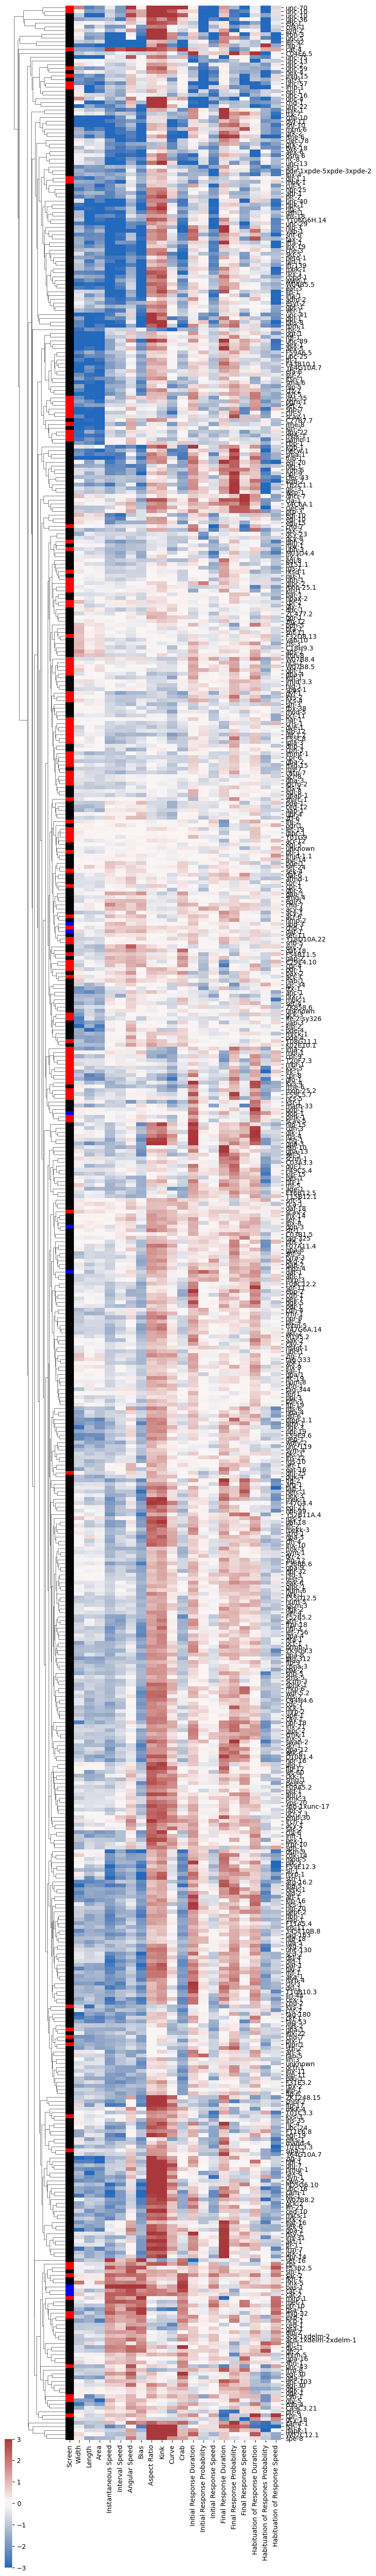

In [9]:
sns.clustermap(
    data_na,
    figsize=(8, 55),
    dendrogram_ratio=(0.2,0),
    cmap=sns.color_palette("vlag", as_cmap=True),
    vmax=3,
    vmin=-3,
    cbar_pos=(0, 0, 0.02, 0.05),
    row_colors=row_colors,
    # method = 'ward',
    # metric = 'canberra',
    row_cluster=True,
    col_cluster=False,
    yticklabels=gene_labels,
)

## Set Input (X) and Output (Y, Classification)

In [10]:
# making labels(Gene), X(features) and Y (target)
Y = category
# Y
X = data_na
# X
labels = gene_labels
# labels

X
Y

0      PD_Screen
1      PD_Screen
2      PD_Screen
3      PD_Screen
4      PD_Screen
         ...    
638    PD_Screen
639    PD_Screen
640    PD_Screen
641    PD_Screen
642    PD_Screen
Name: Screen, Length: 643, dtype: object

In [11]:
print(Y.unique())
Y = Y.replace("ASD_Screen", "Outgroup")
# Y = Y.replace("PD_Screen", "Outgroup") #Rerun kernel with this for in for ASD
Y = Y.replace("Glia_Genes_Screen", "Outgroup")
Y = Y.replace("G-Proteins_Screen", "Outgroup")
Y = Y.replace("Neuron_Genes_Screen", "Outgroup")
Y = Y.replace("DOPAMINE", "Outgroup")
print(Y.unique())

['PD_Screen' 'DOPAMINE' 'ASD_Screen' 'Glia_Genes_Screen'
 'G-Proteins_Screen' 'Neuron_Genes_Screen']
['PD_Screen' 'Outgroup']


## Oversample

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
from imblearn.over_sampling import SVMSMOTE
from collections import Counter

oversample = SVMSMOTE()
# X_OS, Y_OS = oversample.fit_resample(X_train,Y_train)
X_OS, Y_OS = oversample.fit_resample(X,Y)

counter = Counter(Y_OS)
counter_og = Counter(Y)

print(counter)
print(counter_og)

Counter({'PD_Screen': 536, 'Outgroup': 536})
Counter({'Outgroup': 536, 'PD_Screen': 107})


## Random Forrest Classifier

<Axes: xlabel='Features'>

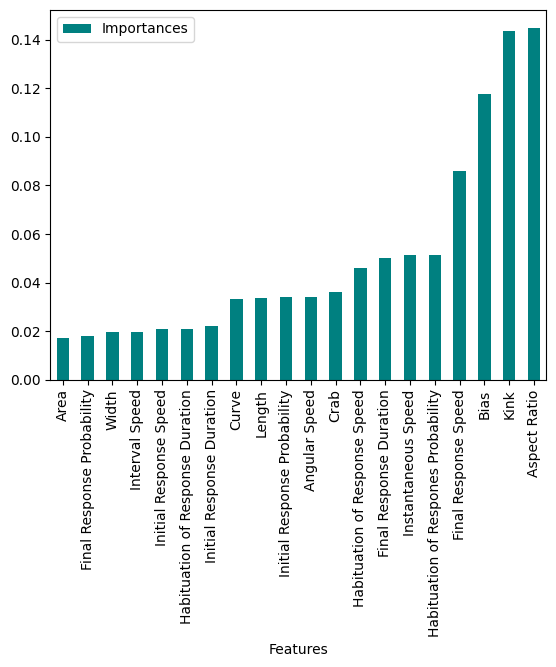

In [16]:
from sklearn.ensemble import RandomForestClassifier

# create random forest model with hyperparameters (keeping default to start)
model = RandomForestClassifier()
model.fit(X_OS, Y_OS)

# get the importance of the resulting features
importances = model.feature_importances_

# create a dataframe for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')
# print(final_df)

# sort in ascending order to better visualzation
final_df = final_df.sort_values('Importances')

# plot the feature importance in bars
final_df.plot.bar(x = 'Features', y='Importances',color = 'teal')

# Splitting the dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Information Gain

<Axes: xlabel='Features'>

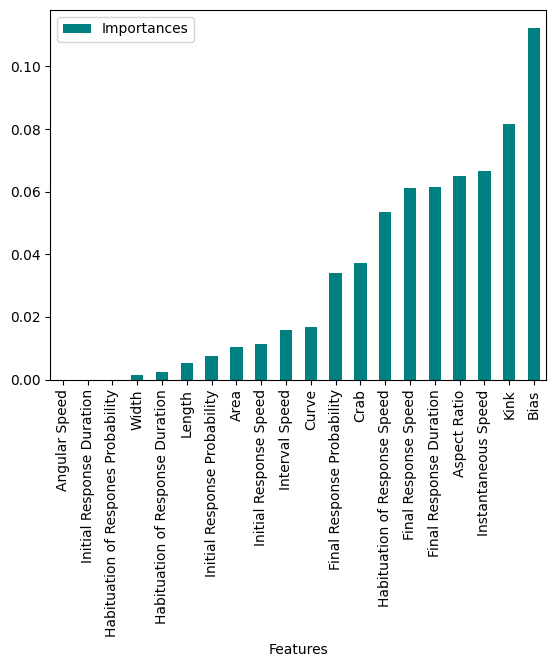

In [33]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,Y)
# create a dataframe for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')
# print(final_df)
# sort in ascending order to better visualzation
final_df = final_df.sort_values('Importances')
# plot the feature importance in bars
final_df.plot(kind='bar',x = 'Features', y='Importances',color = 'teal')


## Fisher Score

<Axes: xlabel='Features'>

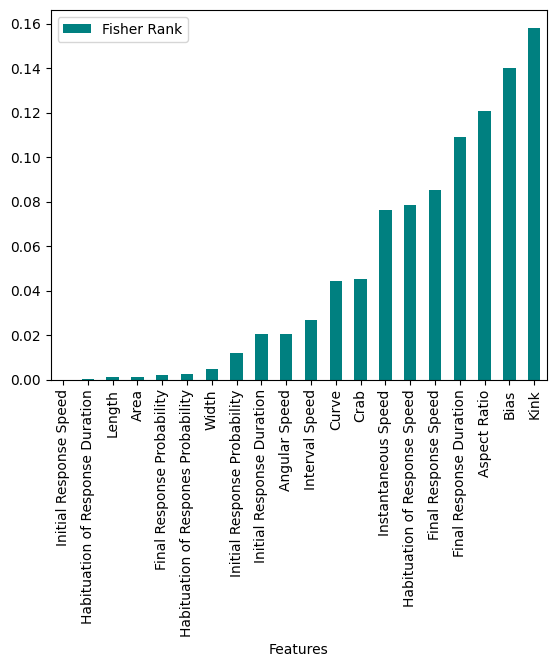

In [34]:
from skfeature.function.similarity_based import fisher_score
%matplotlib inline

ranks = fisher_score.fisher_score(X.to_numpy(),Y.to_numpy())

# create a dataframe for visualization
final_df = pd.DataFrame({"Features": X.columns, "Fisher Rank":ranks})
final_df.set_index('Fisher Rank')
# print(final_df)
# sort in ascending order to better visualzation
final_df = final_df.sort_values('Fisher Rank')
# plot the feature importance in bars
final_df.plot(kind='bar',x = 'Features', y='Fisher Rank',color = 'teal')

## Univariate (ANOVA) Modeling

In [35]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# # Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying ANOVA-based feature selection
k_best = 10  # Choose the number of top features you want to select
selector = SelectKBest(f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Displaying selected feature indices
selected_indices = np.where(selector.get_support())[0]
selected_features = X.columns[selected_indices]
print("Selected feature indices:", selected_indices)
print("Selected features:", selected_features)
# print(X_train_selected)
# Optionally, you can train a model on the selected features
# For example, using a simple classifier like Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train_selected, Y_train)
# Accuracy 0.8217054263565892

# model = LogisticRegression(random_state=42)  
# model.fit(X_train_selected, Y_train)
# Accuracy 0.7286821705426356

# Predicting on the test set
y_pred = model.predict(X_test_selected)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [ 3  5  6  7  8  9 10 14 16 19]
Selected features: Index(['Instantaneous Speed', 'Angular Speed', 'Bias', 'Aspect Ratio', 'Kink',
       'Curve', 'Crab', 'Final Response Duration', 'Final Response Speed',
       'Habituation of Response Speed'],
      dtype='object')
Accuracy on the test set: 0.813953488372093


## Forward Feature Selection

In [82]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# # Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)


# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Applying ANOVA-based feature selection
k_best = 6  # Choose the number of top features you want to select
selector = SelectKBest(f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_OS)
X_test_selected = selector.transform(X_test)

# Displaying selected feature indices
selected_indices = np.where(selector.get_support())[0]
selected_features = X.columns[selected_indices]
print("Selected feature indices:", selected_indices)
print("Selected features:", selected_features)
# print(X_train_selected)
# Optionally, you can train a model on the selected features
# For example, using a simple classifier like Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# model = RandomForestClassifier()
# model.fit(X_train_selected, Y_train_OS)
# Accuracy 0.8217054263565892

model = LogisticRegression(random_state=42)  
model.fit(X_train_selected, Y_train_OS)
# Accuracy 0.7286821705426356

# Predicting on the test set
y_pred = model.predict(X_test_selected)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [ 6  7  8 14 16 19]
Selected features: Index(['Bias', 'Aspect Ratio', 'Kink', 'Final Response Duration',
       'Final Response Speed', 'Habituation of Response Speed'],
      dtype='object')
Accuracy on the test set: 0.8372093023255814


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [52]:
len(Y_test)

129

## More involved algorithms (still forward feature selection, but this time using Random Forest)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def forward_feature_selection(X_train, X_test, Y_train, Y_test, model, max_features=10):
    """
    Forward Feature Selection
    """
    selected_features = []
    best_score = 0

    while len(selected_features) < max_features if max_features else X_train.shape[1]:
        remaining_features = [feature for feature in range(X_train.shape[1]) if feature not in selected_features]
        candidate_scores = []

        for feature in remaining_features:
            current_features = selected_features + [feature]
            model.fit(X_train[:, current_features], Y_train)
            y_pred = model.predict(X_test[:, current_features])
            score = accuracy_score(Y_test, y_pred)
            candidate_scores.append((feature, score))

        # Select the feature that gives the best score
        best_candidate = max(candidate_scores, key=lambda x: x[1])

        # Check if adding the feature improves the model
        if best_candidate[1] > best_score:
            selected_features.append(best_candidate[0])
            best_score = best_candidate[1]
        else:
            break

    return selected_features


# # Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)

# Standardizing the features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier()

# Performing forward feature selection
selected_features = forward_feature_selection(X_Train, X_Test, Y_train_OS, Y_test, model)

print("Selected feature indices:", selected_features)
print("Selected features:", X.columns[selected_features])

# Optionally, you can train a model on the selected features
model.fit(X_Train[:, selected_features], Y_train_OS)
y_pred = model.predict(X_Test[:, selected_features])
y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# pred_conf = pd.DataFrame(np.array([y_pred, y_prob]), columns = ["Prediction", "Confidence"])
d = {'prediction': y_pred, 'confidence': y_prob, "class":Y_test}
df = pd.DataFrame(data=d)
print(df)
# print(pred_conf)

Selected feature indices: [6, 9, 16, 7, 5]
Selected features: Index(['Bias', 'Curve', 'Final Response Speed', 'Aspect Ratio',
       'Angular Speed'],
      dtype='object')
Accuracy on the test set: 0.8992248062015504
    prediction  confidence      class
630  PD_Screen        0.87  PD_Screen
367   Outgroup        0.70   Outgroup
485   Outgroup        1.00   Outgroup
290   Outgroup        1.00   Outgroup
72   PD_Screen        0.80  PD_Screen
..         ...         ...        ...
346   Outgroup        1.00   Outgroup
641  PD_Screen        0.61  PD_Screen
215  PD_Screen        0.51   Outgroup
606   Outgroup        0.99   Outgroup
135   Outgroup        0.77   Outgroup

[129 rows x 3 columns]


In [91]:
len(X_Test)
Y_test

630    PD_Screen
367     Outgroup
485     Outgroup
290     Outgroup
72     PD_Screen
         ...    
346     Outgroup
641    PD_Screen
215     Outgroup
606     Outgroup
135     Outgroup
Name: Screen, Length: 129, dtype: object

## For selected features from feature selection processes above:

In [23]:
# For CIHR GRANT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

selected_features = [6,8,0,17,15,9,3]
# selected_features = [6,9,16,7,5]


print("Selected feature indices:", selected_features)
print("Selected features:", X.columns[selected_features])

# # Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,y_train)

# Standardizing the features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier()

# Optionally, you can train a model on the selected features
model.fit(X_Train[:, selected_features], Y_train_OS)
y_pred = model.predict(X_Test[:, selected_features])
y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# pred_conf = pd.DataFrame(np.array([y_pred, y_prob]), columns = ["Prediction", "Confidence"])
d = {'prediction': y_pred, 'confidence': y_prob, "class":y_test}
df = pd.DataFrame(data=d)
print(df)

Selected feature indices: [6, 8, 0, 17, 15, 9, 3]
Selected features: Index(['Bias', 'Kink', 'Width', 'Habituation of Response Duration',
       'Final Response Probability', 'Curve', 'Instantaneous Speed'],
      dtype='object')
Accuracy on the test set: 0.813953488372093
    prediction  confidence      class
630  PD_Screen        0.82  PD_Screen
367  PD_Screen        0.72   Outgroup
485   Outgroup        0.98   Outgroup
290   Outgroup        0.94   Outgroup
72   PD_Screen        0.89  PD_Screen
..         ...         ...        ...
346   Outgroup        0.90   Outgroup
641  PD_Screen        0.62  PD_Screen
215  PD_Screen        0.91   Outgroup
606   Outgroup        0.92   Outgroup
135  PD_Screen        0.62   Outgroup

[129 rows x 3 columns]


In [107]:
selected_features = [6,8,0,17,15,9,3]
# selected_features = [6,9,16,7,5]


print("Selected feature indices:", selected_features)
print("Selected features:", X.columns[selected_features])

# # Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_OS, Y_OS, test_size=0.2, random_state=42)
# oversample = SVMSMOTE()
# X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)

# Standardizing the features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier()

# Optionally, you can train a model on the selected features
model.fit(X_Train[:, selected_features], Y_train_OS)
y_pred = model.predict(X_Test[:, selected_features])
y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# pred_conf = pd.DataFrame(np.array([y_pred, y_prob]), columns = ["Prediction", "Confidence"])
d = {'prediction': y_pred, 'confidence': y_prob, "class":Y_test}
df = pd.DataFrame(data=d)
print(df)

Selected feature indices: [6, 9, 16, 7, 5]
Selected features: Index(['Bias', 'Curve', 'Final Response Speed', 'Aspect Ratio',
       'Angular Speed'],
      dtype='object')
Accuracy on the test set: 0.8992248062015504
    prediction  confidence      class
630  PD_Screen        0.92  PD_Screen
367   Outgroup        0.58   Outgroup
485   Outgroup        0.99   Outgroup
290   Outgroup        0.91   Outgroup
72   PD_Screen        0.81  PD_Screen
..         ...         ...        ...
346   Outgroup        0.97   Outgroup
641   Outgroup        0.52  PD_Screen
215   Outgroup        0.59   Outgroup
606   Outgroup        1.00   Outgroup
135   Outgroup        0.75   Outgroup

[129 rows x 3 columns]


### Saving the model:

In [91]:
from joblib import dump, load
dump(model, '/Users/Joseph/Desktop/NRSC510B/PD_Screen_Model.joblib') 

['/Users/Joseph/Desktop/NRSC510B/PD_Screen_Model.joblib']

In [85]:
for col in X.columns:
    print(col)

Width
Length
Area
Instantaneous Speed
Interval Speed
Angular Speed
Bias
Aspect Ratio
Kink
Curve
Crab
Initial Response Duration
Initial Response Probability
Initial Response Speed
Final Response Duration
Final Response Probability
Final Response Speed
Habituation of Response Duration
Habituation of Respones Probability
Habituation of Response Speed


## Calculating Precision, Recall, F-Measure

In [108]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def binaryize(inlist):
    for i in range(len(inlist)):
        if inlist[i] == 'Outgroup':
            inlist[i] = 0
        if inlist[i] == 'PD_Screen':
            inlist[i] = 1
    return inlist

y_test_binary = binaryize(y_test.tolist())
y_pred_binary = binaryize(y_pred.tolist())

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"The precision score for this model is {precision}, closer to 1 the better")
print(f"THe recall score for this model is {recall}, closer to 1 the better")
print(f"The F1-Measure for this model is {f1}, closer to 1 the better")

The precision score for this model is 0.8181818181818182, closer to 1 the better
THe recall score for this model is 0.7941176470588235, closer to 1 the better
The F1-Measure for this model is 0.8059701492537314, closer to 1 the better


In [549]:
y_pred_binary

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=object)

## ROC Curve

Text(0, 0.5, 'recall')

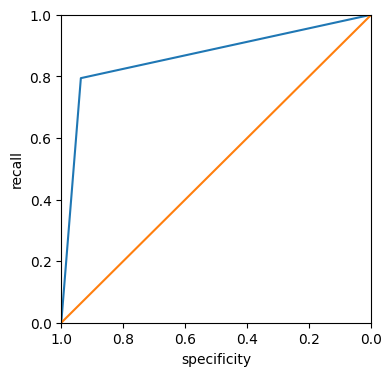

In [109]:
from sklearn.metrics import roc_curve as roc_curve

def binaryize(inlist):
    for i in range(len(inlist)):
        if inlist[i] == 'Outgroup':
            inlist[i] = 0
        if inlist[i] == 'PD_Screen':
            inlist[i] = 1
    return inlist

y_test_binary = binaryize(y_test.tolist())
y_pred_binary = binaryize(y_pred)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary, pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1-fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4,4), legend=False)
ax.set_ylim(0,1)
ax.set_xlim(1,0)
ax.plot((1,0),(0,1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

In [43]:
from sklearn.metrics import roc_auc_score 

print(np.sum(roc_df.recall[:-1]*np.diff(1-roc_df.specificity)))
print(roc_auc_score([1 if yi == 1 else 0 for yi in y_test_binary],
                    y_pred_binary))

0.8828883495145632
0.939623786407767


## Backward Feature Elimination

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def backward_feature_elimination(X_train, X_test, y_train, y_test, model):
    """
    Backward Feature Elimination
    """
    sselected_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
# 10 features: 0.8449612403100775
# 7 features: 0.8449612403100775 <--- 7 features sweet spot
# 6 features: 0.8294573643410853
    while len(sselected_features) > 6:
        current_score = 0
        worst_feature = None

        for feature in sselected_features:
            remaining_features = [f for f in sselected_features if f != feature]
            model.fit(X_train[:, remaining_features], y_train)
            y_pred = model.predict(X_test[:, remaining_features])
            score = accuracy_score(y_test, y_pred)

            if score > current_score:
                current_score = score
                worst_feature = feature

        if worst_feature is not None:
            sselected_features.remove(worst_feature)
        else:
            break

    return sselected_features

# Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train.shape)
# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Performing Backward Feature Elimination (BFE)
sselected_features = backward_feature_elimination(X_train, X_test, y_train, y_test, model)

print("Selected feature indices:", sselected_features)
print("Selected features:", X.columns[sselected_features])

# Optionally, you can train a model on the selected features
model.fit(X_train[:, sselected_features], y_train)
y_pred = model.predict(X_test[:, sselected_features])

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [3, 8, 14, 15, 17, 18]
Selected features: Index(['Instantaneous Speed', 'Kink', 'Final Response Duration',
       'Final Response Probability', 'Habituation of Response Duration',
       'Habituation of Respones Probability'],
      dtype='object')
Accuracy on the test set: 0.8294573643410853


## Recursive Feature Elimination

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Performing Recursive Feature Elimination (RFE)
num_features_to_select = 5  # Choose the number of features to select
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Displaying selected feature indices
selected_features = [i for i in range(len(rfe.support_)) if rfe.support_[i]]
print("Selected feature indices:", selected_features)
print("Selected feature indices:", X.columns[selected_features])

# Optionally, you can train a model on the selected features
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [6, 7, 8, 14, 18]
Selected feature indices: Index(['Bias', 'Aspect Ratio', 'Kink', 'Final Response Duration',
       'Habituation of Respones Probability'],
      dtype='object')
Accuracy on the test set: 0.8062015503875969


# Now Performing Clustering Of PD_Screen Only for Profile Sub-types

In [29]:
# print(tstat_gene.shape)
# print(tstat_gene.columns)
# print(tstat_gene.Screen.unique())
# print(tstat_gene.Gene[tstat_gene.Screen == "PD_Screen"])
PD_Screen = tstat_gene[tstat_gene.Screen == "PD_Screen"].reset_index().drop(columns=['index'])
PD_Screen

,Gene,Width,Length,Area,Instantaneous Speed,Interval Speed,Angular Speed,Bias,Aspect Ratio,Kink,...,Final Response Duration,Final Response Probability,Final Response Speed,Habituation of Response Duration,Habituation of Respones Probability,Habituation of Response Speed,Spontaneous Recovery of Response Duration,Spontaneous Recovery of Response Probability,Spontaneous Recovery of Response Speed,Screen
0,C29E4.10,-0.647055,-0.185658,-0.439891,0.902499,0.928335,1.204435,1.017620,-0.249281,-0.597715,...,-1.973002,-0.538532,-0.441958,0.089889,-1.065384,0.992830,0.905164,-0.185776,0.825983,PD_Screen
1,F32D8.13,0.777410,0.113354,0.436028,-0.246369,-0.123728,-0.476608,-0.002676,-0.013489,-0.149009,...,0.196056,-0.567687,0.251047,0.357877,0.811631,-0.894162,1.853981,0.368868,-0.726157,PD_Screen
2,F53B2.5,-0.301572,-0.184646,-0.406214,2.560500,1.611415,2.544994,2.637826,0.616906,0.196222,...,1.398358,-0.149340,-0.141870,0.151822,0.550300,2.532725,-0.496158,0.761560,1.150484,PD_Screen
3,F54B11.5,-0.833726,-0.436230,-0.755943,0.667368,0.703403,0.875220,0.711684,-0.417555,-0.372645,...,-0.094378,-1.292243,0.214204,-0.199469,-0.766943,0.753337,0.000000,0.294419,1.184813,PD_Screen
4,F55C5.7,-0.735903,-1.264234,-0.681969,-0.386983,-0.730350,-0.194881,0.192844,-0.376255,-0.629048,...,0.393475,2.865312,-0.443459,1.819301,-1.971032,-0.075419,0.069972,-1.559009,0.872535,PD_Screen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,smrc-1,-0.508011,-0.045911,-0.141851,0.124478,0.004395,0.099719,0.179691,-0.371002,-0.611455,...,-0.557210,1.598069,0.152306,-0.374855,-0.930595,-0.326084,-0.016156,-2.824259,-0.668615,PD_Screen
111,ubh-1,-0.166262,-0.319823,-0.247414,-0.763545,-0.932989,-0.574298,-0.407735,0.018780,0.023788,...,0.757095,0.476468,-0.235888,-0.579597,-0.525665,-1.455721,0.918423,-0.490345,0.162001,PD_Screen
112,ubh-2,-0.266350,-0.310579,-0.447278,-1.646930,-2.002079,-1.378958,-1.420836,-0.493602,-0.369114,...,0.119256,0.953872,-0.211999,-0.116123,-1.238908,-2.487642,0.141255,-0.504788,0.065281,PD_Screen
113,ubh-3,-0.668687,-0.423889,-0.774589,-1.331446,-1.290005,-1.086055,-1.087203,-0.550954,-0.253024,...,-1.168823,0.308447,-0.184983,0.562537,-0.646475,-2.000759,-0.158920,0.220963,-1.077998,PD_Screen


In [30]:
print(PD_Screen[PD_Screen.Gene == 'N2'])
PD_Screen = PD_Screen.drop([5,93])
print(PD_Screen[PD_Screen.Gene == 'N2'])

   Gene  Width  Length  Area  Instantaneous Speed  Interval Speed  \
5    N2    0.0     0.0   0.0                  0.0             0.0   
93   N2    0.0     0.0   0.0                  0.0             0.0   

    Angular Speed  Bias  Aspect Ratio  Kink  ...  Final Response Duration  \
5             0.0   0.0           0.0   0.0  ...                      0.0   
93            0.0   0.0           0.0   0.0  ...                      0.0   

    Final Response Probability  Final Response Speed  \
5                          0.0                   0.0   
93                         0.0                   0.0   

    Habituation of Response Duration  Habituation of Respones Probability  \
5                                0.0                                  0.0   
93                               0.0                                  0.0   

    Habituation of Response Speed  Spontaneous Recovery of Response Duration  \
5                             0.0                                        0.0   

In [44]:
# PD_Screen = PD_Screen.drop(columns=['index']).dropna()
PD_Screen = PD_Screen.dropna().reset_index()
PD_Screen

,index,Gene,Width,Length,Area,Instantaneous Speed,Interval Speed,Angular Speed,Bias,Aspect Ratio,...,Final Response Duration,Final Response Probability,Final Response Speed,Habituation of Response Duration,Habituation of Respones Probability,Habituation of Response Speed,Spontaneous Recovery of Response Duration,Spontaneous Recovery of Response Probability,Spontaneous Recovery of Response Speed,Screen
0,0,C29E4.10,-0.647055,-0.185658,-0.439891,0.902499,0.928335,1.204435,1.017620,-0.249281,...,-1.973002,-0.538532,-0.441958,0.089889,-1.065384,0.992830,0.905164,-0.185776,0.825983,PD_Screen
1,1,F32D8.13,0.777410,0.113354,0.436028,-0.246369,-0.123728,-0.476608,-0.002676,-0.013489,...,0.196056,-0.567687,0.251047,0.357877,0.811631,-0.894162,1.853981,0.368868,-0.726157,PD_Screen
2,2,F53B2.5,-0.301572,-0.184646,-0.406214,2.560500,1.611415,2.544994,2.637826,0.616906,...,1.398358,-0.149340,-0.141870,0.151822,0.550300,2.532725,-0.496158,0.761560,1.150484,PD_Screen
3,3,F54B11.5,-0.833726,-0.436230,-0.755943,0.667368,0.703403,0.875220,0.711684,-0.417555,...,-0.094378,-1.292243,0.214204,-0.199469,-0.766943,0.753337,0.000000,0.294419,1.184813,PD_Screen
4,4,F55C5.7,-0.735903,-1.264234,-0.681969,-0.386983,-0.730350,-0.194881,0.192844,-0.376255,...,0.393475,2.865312,-0.443459,1.819301,-1.971032,-0.075419,0.069972,-1.559009,0.872535,PD_Screen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,110,smrc-1,-0.508011,-0.045911,-0.141851,0.124478,0.004395,0.099719,0.179691,-0.371002,...,-0.557210,1.598069,0.152306,-0.374855,-0.930595,-0.326084,-0.016156,-2.824259,-0.668615,PD_Screen
109,111,ubh-1,-0.166262,-0.319823,-0.247414,-0.763545,-0.932989,-0.574298,-0.407735,0.018780,...,0.757095,0.476468,-0.235888,-0.579597,-0.525665,-1.455721,0.918423,-0.490345,0.162001,PD_Screen
110,112,ubh-2,-0.266350,-0.310579,-0.447278,-1.646930,-2.002079,-1.378958,-1.420836,-0.493602,...,0.119256,0.953872,-0.211999,-0.116123,-1.238908,-2.487642,0.141255,-0.504788,0.065281,PD_Screen
111,113,ubh-3,-0.668687,-0.423889,-0.774589,-1.331446,-1.290005,-1.086055,-1.087203,-0.550954,...,-1.168823,0.308447,-0.184983,0.562537,-0.646475,-2.000759,-0.158920,0.220963,-1.077998,PD_Screen


In [45]:
DOP_Genes
PD_Screen['Gene']

0      C29E4.10
1      F32D8.13
2       F53B2.5
3      F54B11.5
4       F55C5.7
         ...   
108      smrc-1
109       ubh-1
110       ubh-2
111       ubh-3
112      unc-70
Name: Gene, Length: 113, dtype: object

In [46]:
for i in range(len(PD_Screen)):
    if PD_Screen.loc[i, "Gene"] in DOP_Genes:
        PD_Screen = PD_Screen.drop([i])
PD_Screen = PD_Screen.reset_index()

In [47]:
PD_Screen

,level_0,index,Gene,Width,Length,Area,Instantaneous Speed,Interval Speed,Angular Speed,Bias,...,Final Response Duration,Final Response Probability,Final Response Speed,Habituation of Response Duration,Habituation of Respones Probability,Habituation of Response Speed,Spontaneous Recovery of Response Duration,Spontaneous Recovery of Response Probability,Spontaneous Recovery of Response Speed,Screen
0,0,0,C29E4.10,-0.647055,-0.185658,-0.439891,0.902499,0.928335,1.204435,1.017620,...,-1.973002,-0.538532,-0.441958,0.089889,-1.065384,0.992830,0.905164,-0.185776,0.825983,PD_Screen
1,1,1,F32D8.13,0.777410,0.113354,0.436028,-0.246369,-0.123728,-0.476608,-0.002676,...,0.196056,-0.567687,0.251047,0.357877,0.811631,-0.894162,1.853981,0.368868,-0.726157,PD_Screen
2,2,2,F53B2.5,-0.301572,-0.184646,-0.406214,2.560500,1.611415,2.544994,2.637826,...,1.398358,-0.149340,-0.141870,0.151822,0.550300,2.532725,-0.496158,0.761560,1.150484,PD_Screen
3,3,3,F54B11.5,-0.833726,-0.436230,-0.755943,0.667368,0.703403,0.875220,0.711684,...,-0.094378,-1.292243,0.214204,-0.199469,-0.766943,0.753337,0.000000,0.294419,1.184813,PD_Screen
4,4,4,F55C5.7,-0.735903,-1.264234,-0.681969,-0.386983,-0.730350,-0.194881,0.192844,...,0.393475,2.865312,-0.443459,1.819301,-1.971032,-0.075419,0.069972,-1.559009,0.872535,PD_Screen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,108,110,smrc-1,-0.508011,-0.045911,-0.141851,0.124478,0.004395,0.099719,0.179691,...,-0.557210,1.598069,0.152306,-0.374855,-0.930595,-0.326084,-0.016156,-2.824259,-0.668615,PD_Screen
103,109,111,ubh-1,-0.166262,-0.319823,-0.247414,-0.763545,-0.932989,-0.574298,-0.407735,...,0.757095,0.476468,-0.235888,-0.579597,-0.525665,-1.455721,0.918423,-0.490345,0.162001,PD_Screen
104,110,112,ubh-2,-0.266350,-0.310579,-0.447278,-1.646930,-2.002079,-1.378958,-1.420836,...,0.119256,0.953872,-0.211999,-0.116123,-1.238908,-2.487642,0.141255,-0.504788,0.065281,PD_Screen
105,111,113,ubh-3,-0.668687,-0.423889,-0.774589,-1.331446,-1.290005,-1.086055,-1.087203,...,-1.168823,0.308447,-0.184983,0.562537,-0.646475,-2.000759,-0.158920,0.220963,-1.077998,PD_Screen


In [48]:
X.columns[selected_features]
selected_features

[6, 8, 0, 17, 15, 9, 3]

In [53]:
PD_Screen1 = PD_Screen[['Gene','Bias', 'Kink', 'Width', 'Habituation of Response Duration', 'Final Response Probability', 'Curve', 'Instantaneous Speed']]

PD_Screen1

,Gene,Bias,Kink,Width,Habituation of Response Duration,Final Response Probability,Curve,Instantaneous Speed
0,C29E4.10,1.017620,-0.597715,-0.647055,0.089889,-0.538532,-0.086174,0.902499
1,F32D8.13,-0.002676,-0.149009,0.777410,0.357877,-0.567687,-0.300701,-0.246369
2,F53B2.5,2.637826,0.196222,-0.301572,0.151822,-0.149340,0.194071,2.560500
3,F54B11.5,0.711684,-0.372645,-0.833726,-0.199469,-1.292243,0.036285,0.667368
4,F55C5.7,0.192844,-0.629048,-0.735903,1.819301,2.865312,-0.753195,-0.386983
...,...,...,...,...,...,...,...,...
102,smrc-1,0.179691,-0.611455,-0.508011,-0.374855,1.598069,-0.630578,0.124478
103,ubh-1,-0.407735,0.023788,-0.166262,-0.579597,0.476468,-0.151754,-0.763545
104,ubh-2,-1.420836,-0.369114,-0.266350,-0.116123,0.953872,-0.945813,-1.646930
105,ubh-3,-1.087203,-0.253024,-0.668687,0.562537,0.308447,-1.701094,-1.331446


In [54]:
selected_feature_names = PD_Screen1.columns
print(selected_feature_names)
print(list(selected_feature_names))
type(list(selected_feature_names))

Index(['Gene', 'Bias', 'Kink', 'Width', 'Habituation of Response Duration',
       'Final Response Probability', 'Curve', 'Instantaneous Speed'],
      dtype='object')
['Gene', 'Bias', 'Kink', 'Width', 'Habituation of Response Duration', 'Final Response Probability', 'Curve', 'Instantaneous Speed']


list

In [55]:
PD_Screen_Genes=PD_Screen1.pop("Gene")

In [56]:
PD_Screen1

,Bias,Kink,Width,Habituation of Response Duration,Final Response Probability,Curve,Instantaneous Speed
0,1.017620,-0.597715,-0.647055,0.089889,-0.538532,-0.086174,0.902499
1,-0.002676,-0.149009,0.777410,0.357877,-0.567687,-0.300701,-0.246369
2,2.637826,0.196222,-0.301572,0.151822,-0.149340,0.194071,2.560500
3,0.711684,-0.372645,-0.833726,-0.199469,-1.292243,0.036285,0.667368
4,0.192844,-0.629048,-0.735903,1.819301,2.865312,-0.753195,-0.386983
...,...,...,...,...,...,...,...
102,0.179691,-0.611455,-0.508011,-0.374855,1.598069,-0.630578,0.124478
103,-0.407735,0.023788,-0.166262,-0.579597,0.476468,-0.151754,-0.763545
104,-1.420836,-0.369114,-0.266350,-0.116123,0.953872,-0.945813,-1.646930
105,-1.087203,-0.253024,-0.668687,0.562537,0.308447,-1.701094,-1.331446


In [57]:
feature_list = ['Bias', 'Kink', 'Width', 'Habituation of Response Duration', 'Final Response Probability', 'Curve', 'Instantaneous Speed']

## K Means Clustering

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto',random_state=0).fit(PD_Screen1)

In [59]:
PD_Screen1['cluster'] = kmeans.labels_
PD_Screen1.head()

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_2298/398120266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD_Screen1['cluster'] = kmeans.labels_


,Bias,Kink,Width,Habituation of Response Duration,Final Response Probability,Curve,Instantaneous Speed,cluster
0,1.017620,-0.597715,-0.647055,0.089889,-0.538532,-0.086174,0.902499,1
1,-0.002676,-0.149009,0.777410,0.357877,-0.567687,-0.300701,-0.246369,3
2,2.637826,0.196222,-0.301572,0.151822,-0.149340,0.194071,2.560500,1
3,0.711684,-0.372645,-0.833726,-0.199469,-1.292243,0.036285,0.667368,3
4,0.192844,-0.629048,-0.735903,1.819301,2.865312,-0.753195,-0.386983,0


In [60]:
kmeans.labels_

array([1, 3, 1, 3, 0, 3, 0, 0, 0, 3, 3, 3, 1, 3, 1, 3, 2, 2, 0, 3, 3, 3,
       1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 2, 0, 1, 0, 0, 3, 0, 0, 2, 3, 3, 2,
       0, 2, 0, 2, 0, 0, 3, 0, 0, 3, 0, 2, 0, 2, 0, 0, 3, 1, 3, 0, 0, 0,
       0, 2, 3, 2, 0, 3, 3, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 0, 3, 0,
       1, 3, 0, 0, 3, 0, 0, 3, 3, 0, 1, 2, 0, 3, 0, 3, 0, 0, 3],
      dtype=int32)

In [61]:
kmeans.cluster_centers_

array([[-0.39096341, -0.55961132, -0.33829845,  0.92136198,  0.926887  ,
        -1.04008131, -0.64037053],
       [ 2.00306896,  0.02835477, -0.73243093,  0.65332612,  0.2579186 ,
         0.03461365,  1.72488759],
       [-0.63766871, -0.41689838, -2.39395002,  0.35521955,  0.83022087,
        -1.32634671, -0.72677523],
       [ 0.0151396 ,  0.7153116 , -0.25335807, -0.37174926, -0.25465398,
         0.29404686, -0.25493639]])

In [62]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Bias', 'Kink', 'Width', 'Habituation of Response Duration', 'Final Response Probability', 'Curve', 'Instantaneous Speed'])
centers

,Bias,Kink,Width,Habituation of Response Duration,Final Response Probability,Curve,Instantaneous Speed
0,-0.390963,-0.559611,-0.338298,0.921362,0.926887,-1.040081,-0.640371
1,2.003069,0.028355,-0.732431,0.653326,0.257919,0.034614,1.724888
2,-0.637669,-0.416898,-2.393950,0.355220,0.830221,-1.326347,-0.726775
3,0.015140,0.715312,-0.253358,-0.371749,-0.254654,0.294047,-0.254936


In [63]:
kmeans_counter=Counter(kmeans.labels_)
kmeans_counter

Counter({0: 41, 3: 38, 2: 17, 1: 11})

In [64]:
kmeans.labels_

array([1, 3, 1, 3, 0, 3, 0, 0, 0, 3, 3, 3, 1, 3, 1, 3, 2, 2, 0, 3, 3, 3,
       1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 2, 0, 1, 0, 0, 3, 0, 0, 2, 3, 3, 2,
       0, 2, 0, 2, 0, 0, 3, 0, 0, 3, 0, 2, 0, 2, 0, 0, 3, 1, 3, 0, 0, 0,
       0, 2, 3, 2, 0, 3, 3, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 0, 3, 0,
       1, 3, 0, 0, 3, 0, 0, 3, 3, 0, 1, 2, 0, 3, 0, 3, 0, 0, 3],
      dtype=int32)

In [65]:
kmeans.n_features_in_

7

In [66]:
import matplotlib.pyplot as plt

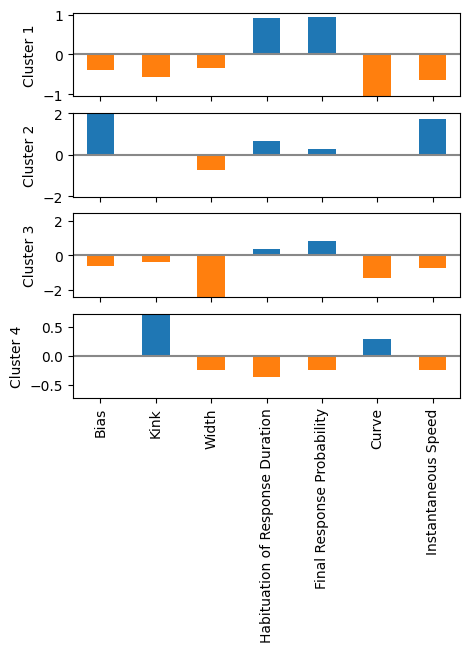

In [67]:
centers = pd.DataFrame(kmeans.cluster_centers_,columns=feature_list)

f,axes = plt.subplots(4,1, figsize=(5,5), sharex=True)
for i,ax in enumerate(axes):
    center = centers.loc[i,:]
    maxPC = 1.01*np.max(np.max(np.abs(center)))
    colors=['C0' if l>0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC, maxPC)

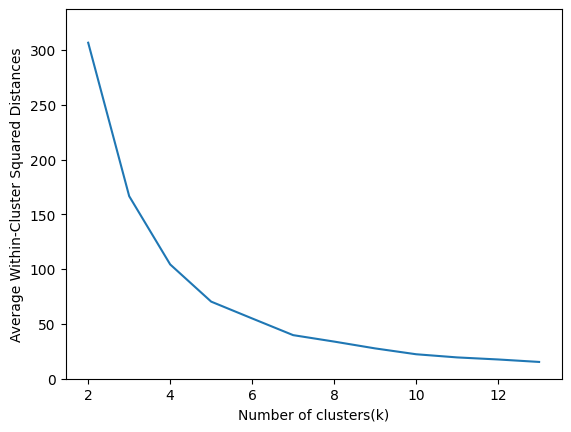

In [68]:
inertia = []
for n_clusters in range(2,14):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0).fit(PD_Screen1)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2,14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0,1.1*inertias.inertia.max()))
ax.legend().set_visible(False)

In [459]:
centers

,Bias,Kink,Width,Habituation of Response Duration,Final Response Probability,Curve,Instantaneous Speed
0,-0.390963,-0.559611,-0.338298,0.921362,0.926887,-1.040081,-0.640371
1,2.003069,0.028355,-0.732431,0.653326,0.257919,0.034614,1.724888
2,-0.637669,-0.416898,-2.393950,0.355220,0.830221,-1.326347,-0.726775
3,0.015140,0.715312,-0.253358,-0.371749,-0.254654,0.294047,-0.254936


In [520]:
# from plotly.subplots import make_subplots
# import plotly.express as px
# import plotly.graph_objects as go

# fig = make_subplots(cols=2, rows=2,
#                     specs=[[{"type": "polar"} for _ in range(2)] for _ in range(2)],
#                     # subplot_titles=("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5")
#                    )


# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[0], theta = centers.columns, fill="toself",name="(Cluster 1)"),
#     row=1, col=1
# )


# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[1], theta = centers.columns, fill="toself",name="(Cluster 2)"),
#     row=1, col=2
# )

# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[2], theta = centers.columns, fill="toself",name="(Cluster 3)"),
#     row=2, col=1
# )

# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[3], theta = centers.columns, fill="toself",name="(Cluster 4)"),
#     row=2, col=2
# )



# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True
#     ),
#   ),
#   showlegend=False
# )

# fig.update_layout(height=1500, width=1000, template='plotly_dark',title_text="5 'Profiles' associated with PD genotype")
# fig.update_polars(radialaxis=dict(range=[-3, 3]))
# fig.show()

In [70]:
# centers.loc[row].values.flatten().tolist()
list(centers)[0:]
cols=['Habituation of Response Duration','Bias','Kink','Final Response Probability','Curve','Instantaneous Speed','Width']
centers=centers[cols]
centers

,Habituation of Response Duration,Bias,Kink,Final Response Probability,Curve,Instantaneous Speed,Width
0,0.921362,-0.390963,-0.559611,0.926887,-1.040081,-0.640371,-0.338298
1,0.653326,2.003069,0.028355,0.257919,0.034614,1.724888,-0.732431
2,0.355220,-0.637669,-0.416898,0.830221,-1.326347,-0.726775,-2.393950
3,-0.371749,0.015140,0.715312,-0.254654,0.294047,-0.254936,-0.253358


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_2298/1240572848.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("tab10", len(centers.index))


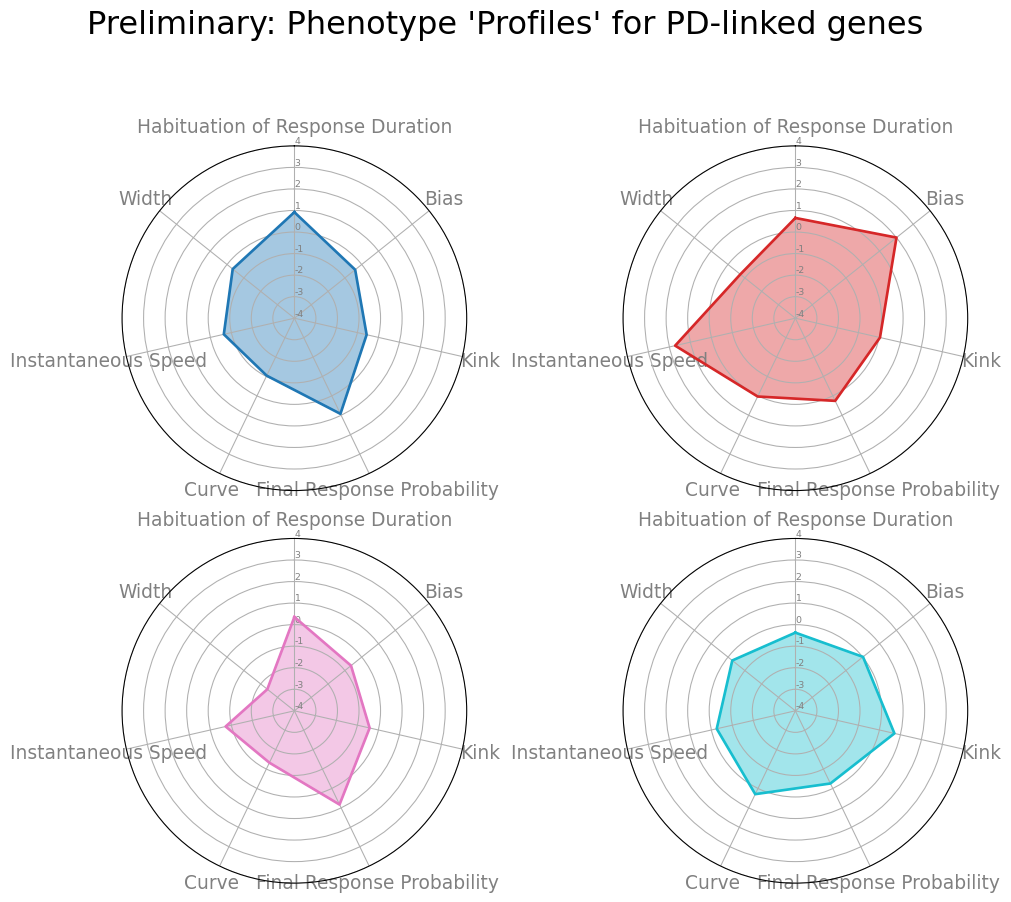

In [80]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import matplotlib
 
Title = "Preliminary: Phenotype 'Profiles' for PD-linked genes"
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):

    # number of variable
    categories=list(centers)[0:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], ["-5","-4","-3","-2","-1","0","1","2","3","4","5"], color="grey", size=7)
    plt.ylim(-4,4)

    # Ind1
    values=centers.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi, layout='compressed')
# Create a color palette:
my_palette = plt.cm.get_cmap("tab10", len(centers.index))
 
# Loop to plot
for row in range(0, len(centers.index)):
    make_spider(row=row, title="", color=my_palette(row))
plt.suptitle(Title, size=24)
plt.savefig('/Users/Joseph/Desktop/NRSC510B/cluster_profiles.png', format='png', dpi=450, bbox_inches='tight')

## Plotting Individual Genotypes

In [463]:
PD_Screen_plot = PD_Screen[['Gene','Bias', 'Kink', 'Width', 'Habituation of Response Duration', 'Final Response Probability', 'Curve', 'Instantaneous Speed']]

cols=['Gene','Habituation of Response Duration','Bias','Kink','Final Response Probability','Curve','Instantaneous Speed','Width']
PD_Screen_plot=PD_Screen_plot[cols]
PD_Screen_plot

,Gene,Habituation of Response Duration,Bias,Kink,Final Response Probability,Curve,Instantaneous Speed,Width
0,C29E4.10,0.089889,1.017620,-0.597715,-0.538532,-0.086174,0.902499,-0.647055
1,F32D8.13,0.357877,-0.002676,-0.149009,-0.567687,-0.300701,-0.246369,0.777410
2,F53B2.5,0.151822,2.637826,0.196222,-0.149340,0.194071,2.560500,-0.301572
3,F54B11.5,-0.199469,0.711684,-0.372645,-1.292243,0.036285,0.667368,-0.833726
4,F55C5.7,1.819301,0.192844,-0.629048,2.865312,-0.753195,-0.386983,-0.735903
...,...,...,...,...,...,...,...,...
102,smrc-1,-0.374855,0.179691,-0.611455,1.598069,-0.630578,0.124478,-0.508011
103,ubh-1,-0.579597,-0.407735,0.023788,0.476468,-0.151754,-0.763545,-0.166262
104,ubh-2,-0.116123,-1.420836,-0.369114,0.953872,-0.945813,-1.646930,-0.266350
105,ubh-3,0.562537,-1.087203,-0.253024,0.308447,-1.701094,-1.331446,-0.668687


In [464]:
PD_Screen_cluster = PD_Screen[['Gene','Bias', 'Kink', 'Width', 'Habituation of Response Duration', 'Final Response Probability', 'Curve', 'Instantaneous Speed']]
PD_Screen_cluster['cluster'] = kmeans.labels_
PD_Screen_cluster.head()

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_48731/4112531131.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gene,Bias,Kink,Width,Habituation of Response Duration,Final Response Probability,Curve,Instantaneous Speed,cluster
0,C29E4.10,1.017620,-0.597715,-0.647055,0.089889,-0.538532,-0.086174,0.902499,1
1,F32D8.13,-0.002676,-0.149009,0.777410,0.357877,-0.567687,-0.300701,-0.246369,3
2,F53B2.5,2.637826,0.196222,-0.301572,0.151822,-0.149340,0.194071,2.560500,1
3,F54B11.5,0.711684,-0.372645,-0.833726,-0.199469,-1.292243,0.036285,0.667368,3
4,F55C5.7,0.192844,-0.629048,-0.735903,1.819301,2.865312,-0.753195,-0.386983,0


In [497]:
cols=['Gene','Habituation of Response Duration','Bias','Kink','Final Response Probability','Curve','Instantaneous Speed','Width','cluster']
PD_Screen_cluster=PD_Screen_cluster[cols]
PD_Screen_cluster

,Gene,Habituation of Response Duration,Bias,Kink,Final Response Probability,Curve,Instantaneous Speed,Width,cluster
0,C29E4.10,0.089889,1.017620,-0.597715,-0.538532,-0.086174,0.902499,-0.647055,1
1,F32D8.13,0.357877,-0.002676,-0.149009,-0.567687,-0.300701,-0.246369,0.777410,3
2,F53B2.5,0.151822,2.637826,0.196222,-0.149340,0.194071,2.560500,-0.301572,1
3,F54B11.5,-0.199469,0.711684,-0.372645,-1.292243,0.036285,0.667368,-0.833726,3
4,F55C5.7,1.819301,0.192844,-0.629048,2.865312,-0.753195,-0.386983,-0.735903,0
...,...,...,...,...,...,...,...,...,...
102,smrc-1,-0.374855,0.179691,-0.611455,1.598069,-0.630578,0.124478,-0.508011,0
103,ubh-1,-0.579597,-0.407735,0.023788,0.476468,-0.151754,-0.763545,-0.166262,3
104,ubh-2,-0.116123,-1.420836,-0.369114,0.953872,-0.945813,-1.646930,-0.266350,0
105,ubh-3,0.562537,-1.087203,-0.253024,0.308447,-1.701094,-1.331446,-0.668687,0


In [469]:
PD_Screen_plot['Gene'][0]

PD_Screen_plot.Gene[PD_Screen_plot.Gene == 'C29E4.10'].index

Index([0], dtype='int64')

In [472]:
import ipywidgets as widgets

Gene_Dropdown = widgets.Dropdown(
                    options=list(PD_Screen_plot['Gene']),
                    value=PD_Screen_plot['Gene'][0],
                    description='Gene:',
                    disabled=False,
                )
display(Gene_Dropdown)

Dropdown(description='Gene:', options=('C29E4.10', 'F32D8.13', 'F53B2.5', 'F54B11.5', 'F55C5.7', 'T08G11.1', '…

In [558]:
PD_Screen_cluster.loc[PD_Screen_cluster.Gene[PD_Screen_cluster.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[-1]

2

In [559]:
PD_Screen_plot.loc[PD_Screen_plot.Gene[PD_Screen_plot.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[:]

['rme-8',
 -0.5008077013095229,
 -1.2518717501301075,
 -0.395343592674076,
 -0.676821422584573,
 -1.9008842268943646,
 -1.0409659628405183,
 -3.6960172706365646]

In [530]:

# # number of variable
# categories=list(PD_Screen_plot)[1:]
# N = len(categories)
 
# # We are going to plot the first line of the data frame.
# # But we need to repeat the first value to close the circular graph:
# values=PD_Screen_plot.loc[PD_Screen_plot.Gene[PD_Screen_plot.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[1:]
# values += values[:1]
# values
 
# # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]
 
# # Initialise the spider plot
# ax = plt.subplot(111, polar=True)

# # If you want the first axis to be on top:
# ax.set_theta_offset(pi / 2)
# ax.set_theta_direction(-1)

# # Draw one axe per variable + add labels
# plt.xticks(angles[:-1], categories, color='grey', size=8)



# # Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], ["-5","-4","-3","-2","-1","0","1","2","3","4","5"], color="grey", size=7)
# plt.ylim(-4,4)
 
# # Plot data
# ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# # Fill area
# ax.fill(angles, values, 'b', alpha=0.2)

# # Show the graph
# plt.show()

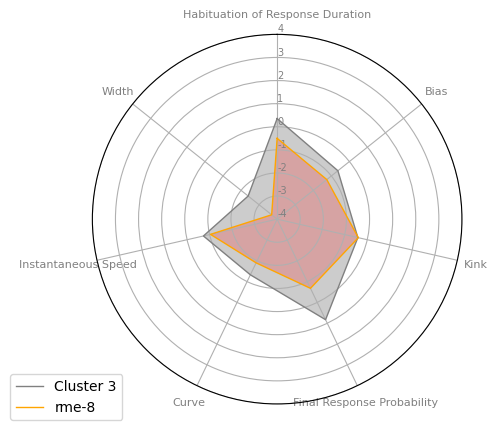

In [561]:
# ------- PART 1: Create background
 
# number of variable
categories=list(PD_Screen_plot)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)

 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], ["-5","-4","-3","-2","-1","0","1","2","3","4","5"], color="grey", size=7)
plt.ylim(-4,4)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
cluster_row = PD_Screen_cluster.loc[PD_Screen_cluster.Gene[PD_Screen_cluster.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[-1]
values=centers.loc[cluster_row].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="grey",label=f"Cluster {cluster_row+1}")
ax.fill(angles, values, 'grey', alpha=0.4)
 
# Ind2
values=PD_Screen_plot.loc[PD_Screen_plot.Gene[PD_Screen_plot.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[1:]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="orange",label=f"{Gene_Dropdown.value}")
ax.fill(angles, values, 'r', alpha=0.2)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.savefig(f'/Users/Joseph/Desktop/NRSC510B/{Gene_Dropdown.value}_profile.png', format='png', dpi=450, bbox_inches='tight')
plt.show()
# plt.savefig(f'/Users/Joseph/Desktop/NRSC510B/{Gene_Dropdown.value}_profile.png', format='png', dpi=450, bbox_inches='tight')